In [27]:
import pandas as pd

In [28]:
train_label_df = pd.read_csv("data/kaggle-pneumonia-jpg/stage_2_train_labels.csv")

In [29]:
train_label_df


,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1


In [30]:
train_label_df["img_path"] = "data/kaggle-pneumonia-jpg/stage_2_train_images_jpg/" + train_label_df["patientId"] + ".jpg"

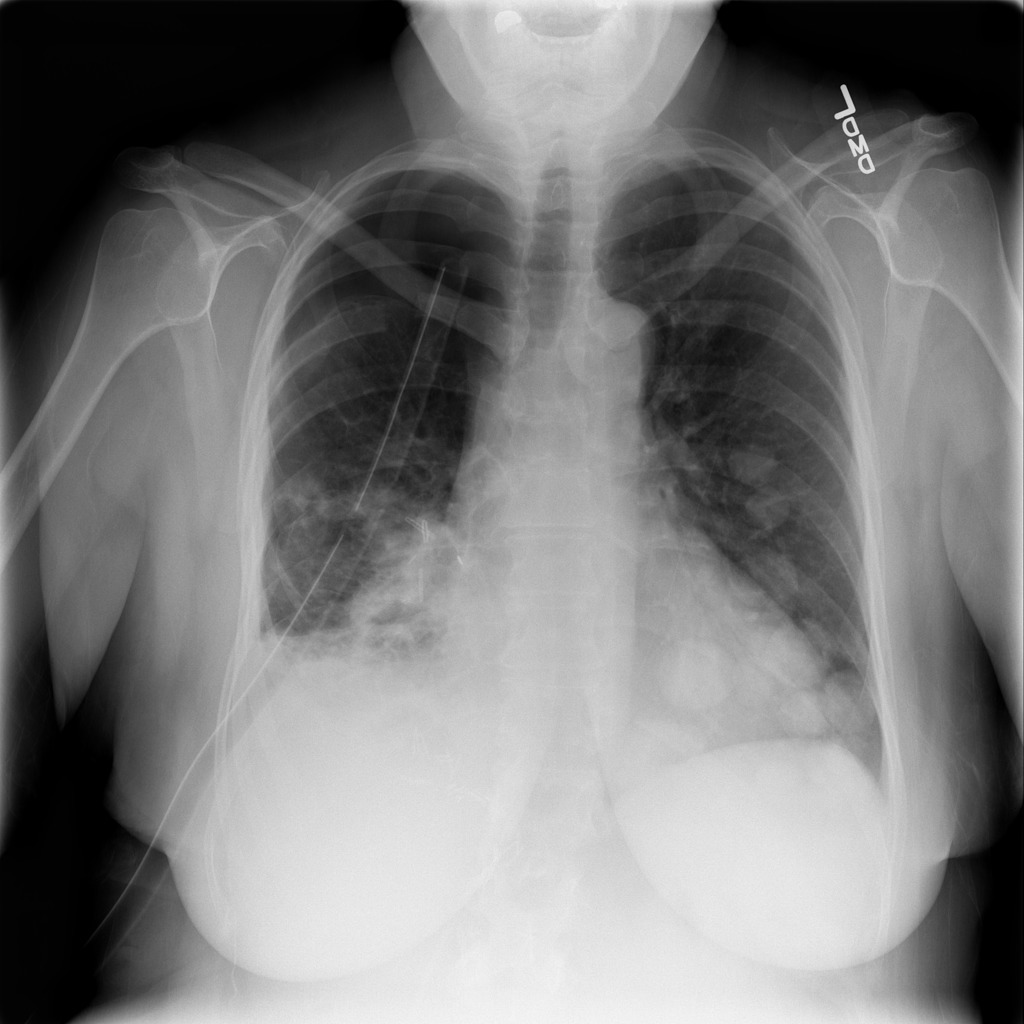

0
x, y:  (1024, 1024)


In [31]:
from PIL import Image

idx = 0

pil_img = Image.open(train_label_df["img_path"][idx])
pil_img.show()

label = train_label_df["Target"][idx]
print(label)

print("x, y: ", pil_img.size)


In [15]:
from tqdm import tqdm
# init for pandas
tqdm.pandas()


root = "data/kaggle-pneumonia-jpg/small_jpg/"
import os
os.makedirs(root, exist_ok=True)
# resize to 256x256 using LANCZOS and save to small_jpg folder
def resize_and_save(img_path, id_, target_size):
    img = Image.open(img_path)
    img = img.resize(target_size, Image.LANCZOS)
    img.save(root + id_ + ".jpg", subsample=0, quality=95)
  
train_label_df.progress_apply(lambda row: resize_and_save(row["img_path"], row["patientId"], (256, 256)), axis=1)
  

100%|██████████| 30227/30227 [17:14<00:00, 29.22it/s]


0        None
1        None
2        None
3        None
4        None
         ... 
30222    None
30223    None
30224    None
30225    None
30226    None
Length: 30227, dtype: object

In [39]:
# modify img_path to small_jpg
train_label_df["img_path"] = train_label_df["patientId"].progress_apply(lambda x: root + x + ".jpg")

100%|██████████| 30227/30227 [00:00<00:00, 330008.19it/s]


In [40]:
# add "split" column for train, validation and test split
def add_splits(df):
    df["split"] = "train"
    from sklearn.model_selection import train_test_split
    x_dev, x_test = train_test_split(df, test_size=0.1, random_state=42, stratify=df["Target"])
    x_test["split"] = "test"
    x_train, x_val = train_test_split(x_dev, test_size=0.1, random_state=42, stratify=x_dev["Target"])
    x_val["split"] = "val"
    df = pd.concat([x_train, x_val, x_test])
    return df

train_label_df = add_splits(train_label_df)

In [42]:
import numpy as np

# add "labels" columns that is a np array of the Target
train_label_df["labels"] = train_label_df["Target"].apply(lambda x: np.array([x]))

In [43]:
# drop unnecessary columns
train_label_df = train_label_df.drop(columns=["Target", "width", "height", "x", "y", "patientId"])

In [46]:
# save as pkl
path = "rsna/"
os.makedirs(path, exist_ok=True)
train_label_df.to_pickle(path + "final_df.pkl")
# save label names
label_names = ["pneumonia"]
np.save(path + "label_names.npy", label_names)